<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Mini%20Project%202/MP2_Q1_Bayse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Data

In [ ]:
!gdown 1bxA9N8pxyFSHmV2TCEyT-y98kjkbuWuk
#https://drive.google.com/file/d/1bxA9N8pxyFSHmV2TCEyT-y98kjkbuWuk/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1bxA9N8pxyFSHmV2TCEyT-y98kjkbuWuk
To: /content/spam.csv
100% 504k/504k [00:00<00:00, 65.0MB/s]


In [ ]:
import pandas as pd
mails = pd.read_csv("/content/spam.csv", encoding='latin-1')
print(mails)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


#Preprocessing

In [ ]:
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
print(mails)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


#Train Test Split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(mails['v2'], mails['v1'], test_size = 0.2)


In [ ]:
vectorizer = CountVectorizer(stop_words = 'english', lowercase = True, binary = False)


In [ ]:
vectorizer.fit(x_train)


CountVectorizer(stop_words='english')

In [ ]:
X_train = vectorizer.transform(x_train)


In [ ]:
X_test = vectorizer.transform(x_test)


#From Scratch

In [ ]:
import numpy as np

class MultiNB:
    def _prior(self):
        prior = []
        for i in self.classes_:
            prior.append(np.sum(self.y == i) / self.n_samples)
        return prior

    def fit(self, X, y):
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.classes_ = np.unique(y)
        self.n_classes_ = self.classes_.shape[0]
        self.class_priors_ = self._prior()

        self.uniques = []
        for i in range(self.n_features):
            tmp = np.unique(X[:, i])
            self.uniques.append(tmp)

        self.N_yi = np.zeros((self.n_classes_, self.n_features))
        self.N_y = np.zeros((self.n_classes_))
        for idx, i in enumerate(self.classes_):
            indices = np.argwhere(self.y == i).flatten()
            columnwise_sum = []
            for j in range(self.n_features):
                columnwise_sum.append(np.sum(X[indices, j]))


            self.N_yi[idx] = columnwise_sum
            self.N_y[idx] = np.sum(columnwise_sum)

    def predict(self, X):
        X = X.toarray()

        y_pred = []

        for x in X:
            posteriors = []
            for idx, c in enumerate(self.classes_):
                log_prior = np.log(self.class_priors_[idx])

                log_likelihood = 0
                for feature_index in range(self.n_features):
                    if x[feature_index] > 0:
                        log_likelihood += np.log((self.N_yi[idx, feature_index] + 1) / (self.N_y[idx] + self.n_features))

                posterior = log_prior + log_likelihood
                posteriors.append(posterior)

            y_pred.append(self.classes_[np.argmax(posteriors)])

        return np.array(y_pred)

#From scikit learn

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

#Comparing Models

In [ ]:
MyNB=MultiNB()
MyNB.fit(X_train, y_train)


In [ ]:
pred1 = MyNB.predict(X_test)
pred2=model.predict(X_test)


In [ ]:
print(pred1)
print(pred2)


['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


##Evaluation

##Precision and Recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       977
        spam       0.98      0.91      0.94       138

    accuracy                           0.99      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       977
        spam       0.98      0.91      0.94       138

    accuracy                           0.99      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



#Confusion Matrix

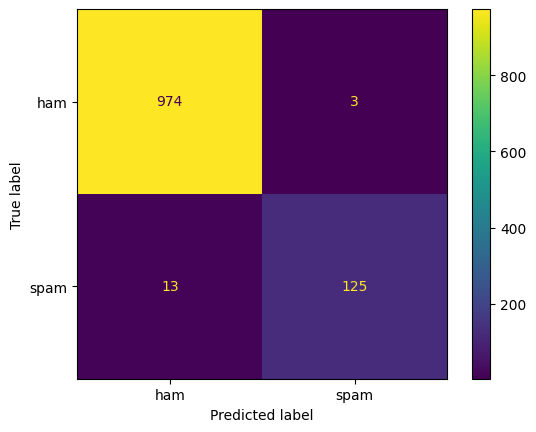

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,pred1)
names = list(mails.groupby('v1').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot()
plt.show()

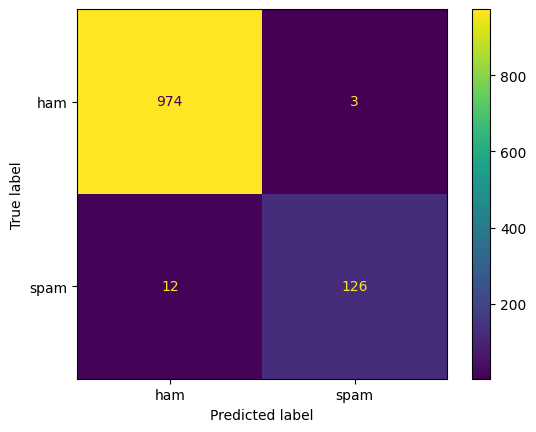

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,pred2)
names = list(mails.groupby('v1').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot()
plt.show()